In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="2.tflite")
interpreter.allocate_tensors()

with open('2_labelmap.txt','r') as f:
    labels = f.read(-1)

labels = labels.splitlines()
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
labels = np.array(labels)

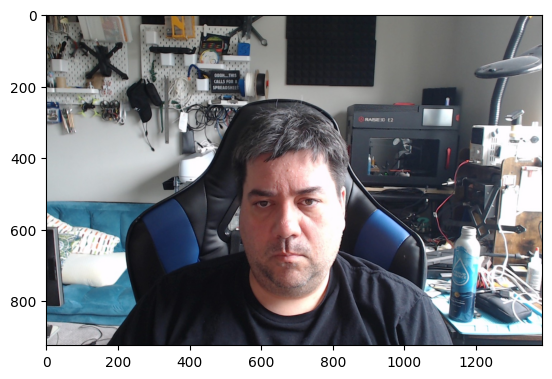

In [36]:
# Test model on random input data.
input_shape = input_details[0]['shape']

#img = Image.open('WIN_20240502_11_34_42_Pro.jpg')

#img = Image.open('WIN_20240502_11_34_51_Pro.jpg')
#img = Image.open('room.jpg')

img = Image.open('room.jpg')
#img = Image.open('table_objects.jpg')
data = np.array(img.resize(input_shape[1:3],Image.Resampling.LANCZOS))
data = data[np.newaxis,...]
plt.imshow(img)

In [8]:
interpreter.set_tensor(input_details[0]['index'], data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
loc = interpreter.get_tensor(output_details[0]['index']).clip(0,1)
classes = interpreter.get_tensor(output_details[1]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])
num_detections = interpreter.get_tensor(output_details[3]['index'])


In [9]:
locations = np.array(loc[0,:,:]*[img.height, img.width, img.height, img.width]).round().astype(np.uint32)

locations

array([[ 230,  102,  919, 1274],
       [ 251,  827,  493, 1148],
       [ 578, 1122,  844, 1232],
       [ 344,  279,  798, 1064],
       [ 498,  211,  728, 1106],
       [ 479,  826,  741, 1072],
       [ 193,    6,  538,  416],
       [ 576, 1081,  851, 1212],
       [  69,  436,  149,  514],
       [   0,  663,  217,  937]], dtype=uint32)

In [10]:
classes = classes.astype(np.uint32)
classes

array([[ 0, 71,  0, 61, 61, 61, 80,  0,  0, 71]], dtype=uint32)

In [11]:
labels[classes[0]]

array(['person', 'tv', 'person', 'chair', 'chair', 'chair', 'sink',
       'person', 'person', 'tv'], dtype='<U14')

In [12]:
scores

array([[0.7109375 , 0.44921875, 0.4375    , 0.40234375, 0.390625  ,
        0.37890625, 0.37890625, 0.3671875 , 0.35546875, 0.34375   ]],
      dtype=float32)

In [13]:
num_detections

array([10.], dtype=float32)

In [34]:
draw_img = img.copy()
drawing = ImageDraw.Draw(draw_img)
f = ImageFont.truetype('Courier New.ttf',20)

for v in range(locations.shape[0]):
    if scores[0,v] < 0.4:
        continue
    drawing.rectangle([locations[v,1], locations[v,0], locations[v,3],locations[v,2]],outline='green',width=3)
    drawing.text([locations[v,1]+4, locations[v,0]+2],fill='white', stroke_width=4, 
                 stroke_fill='black',font=f,  text=f'{labels[classes[0,v]]} @ {scores[0,v]*100:.1f}%')


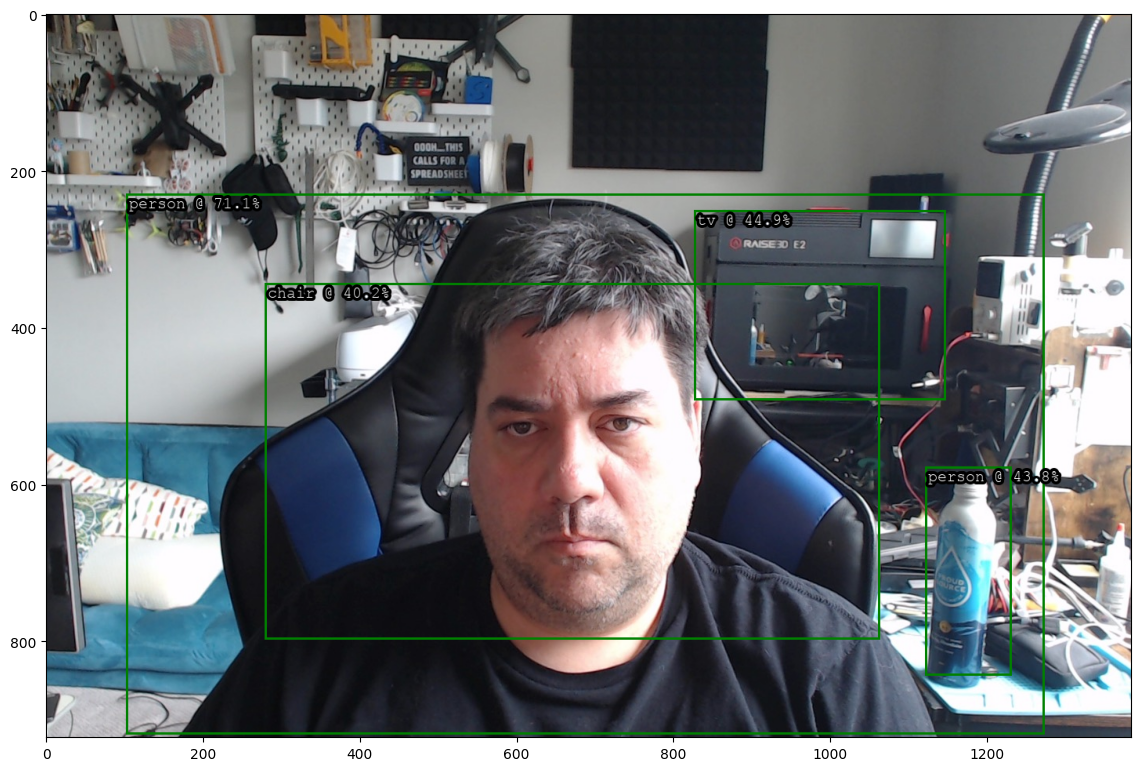

In [35]:
plt.figure(figsize=(14,10))
plt.imshow(draw_img)